In [1]:
# This notebook illustrates example outputs from Funman, and how to work with the ParameterSpace object it creates.

# Import funman related code

from pathlib import Path
from funman import FunmanResults
import json
from funman import Point, Box, Parameter
from typing import List, Dict

# %load_ext autoreload
# %autoreload 2

In [2]:
SAVED_RESULTS_DIR = Path("saved-results").resolve()
SAVED_RESULT_FILES = [
    "e466f678-c60d-4117-bd58-bed949c512cf.json"
]
SAVED_RESULT_TO_USE = SAVED_RESULTS_DIR / SAVED_RESULT_FILES[0]

with open(SAVED_RESULT_TO_USE, "r") as f:
    # Create a FunmanResults object
    results: FunmanResults = FunmanResults.model_validate(json.load(f))

print(f"Model has the symbols: {results.model._symbols()}")

Model has the symbols: ['Susceptible', 'Diagnosed', 'Infected', 'Ailing', 'Recognized', 'Healed', 'Threatened', 'Extinct', 'beta', 'gamma', 'delta', 'alpha', 'epsilon', 'zeta', 'lambda', 'eta', 'rho', 'theta', 'kappa', 'mu', 'nu', 'xi', 'tau', 'sigma', 't']


<Axes: title={'center': 'Point Trajectories'}, xlabel='Time', ylabel='Infected'>

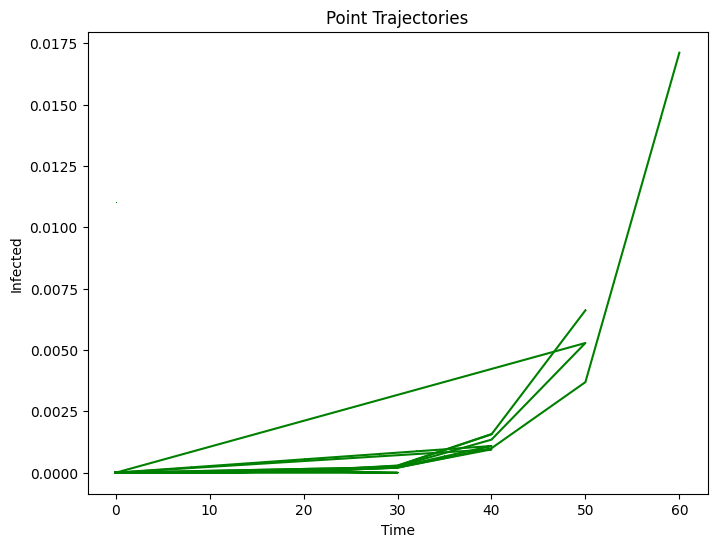

In [3]:
# Plot the trajectories for each point in the ParameterSpace

results.plot(variables=["Infected"], label_marker={"true":",", "false": ","},  xlabel="Time", ylabel="Infected")


In [4]:
# Example uses the result object created by FUNMAN
# - Get the points and boxes
# - Get the parameters corresponding to a point
# - Generate a dataframe with the point timeseries



points: List[Point] = results.points()
boxes: List[Box] = results.parameter_space.boxes()

num_true_points = len(results.parameter_space.true_points())
num_false_points = len(results.parameter_space.false_points())
num_true_boxes = len(results.parameter_space.true_boxes)
num_false_boxes = len(results.parameter_space.false_boxes)

print(
    f"{len(points)} Points (+:{num_true_points}, -:{num_false_points}), {len(boxes)} Boxes (+:{num_true_boxes}, -:{num_true_boxes})"
)
if points and len(points) > 0:
    point: Point = points[-1]
    parameters: Dict[Parameter, float] = results.point_parameters(point)
    print(parameters)
    print(results.dataframe([point]))
else:
    # if there are no points, then we have a box that we found without needing points

    box = boxes[0]
    print(json.dumps(box.explain(), indent=4))

43 Points (+:34, -:9), 43 Boxes (+:34, -:34)
{beta[0.011, 0.011): 0.011, gamma[0.456, 0.456): 0.456, delta[0.011, 0.011): 0.011, alpha[0.57, 0.57): 0.57, epsilon[0.1368, 0.20520000000000002): 0.1851337291300297, zeta[0.125, 0.125): 0.125, lambda[0.034, 0.034): 0.034, eta[0.125, 0.125): 0.125, rho[0.034, 0.034): 0.034, theta[0.2968, 0.4452): 0.3694555829524995, kappa[0.017, 0.017): 0.017, mu[0.017, 0.017): 0.017, nu[0.027, 0.027): 0.027, xi[0.017, 0.017): 0.017, tau[0.01, 0.01): 0.01, sigma[0.017, 0.017): 0.017}
                    Ailing     Diagnosed       Extinct        Healed  \
time                                                                   
0.000000e+00  1.666667e-08  3.333333e-07  0.000000e+00  0.000000e+00   
3.333333e-09  1.833333e-08  3.033333e-07  3.333333e-09  3.333333e-09   
6.666667e-09  2.000000e-08  2.733333e-07  6.666667e-09  6.666667e-09   
1.000000e-08  2.166667e-08  2.433333e-07  1.000000e-08  1.000000e-08   
1.333333e-08  2.333333e-08  2.133333e-07  1.333333e

In [5]:
# Get the corner points of a box

results.parameter_space.false_boxes[0].corner_points

[]

In [7]:
# Get the state varibles and parameters from a point (used by the dataframe timeseries function above)

results.parameter_space.true_points()[0].values

{'Recognized_0': 3.33333333e-08,
 'beta': 0.011,
 'Healed_0': 0.0,
 'gamma': 0.456,
 'Threatened_0': 0.0,
 'epsilon': 0.14897500000000005,
 'delta': 0.011,
 'Extinct_0': 0.0,
 'alpha': 0.57,
 'zeta': 0.125,
 'theta': 0.35245000000000004,
 'lambda': 0.034,
 'eta': 0.125,
 'rho': 0.034,
 'kappa': 0.017,
 'mu': 0.017,
 'nu': 0.027,
 'xi': 0.017,
 'tau': 0.01,
 'sigma': 0.017,
 'Infected_0': 3.33333333e-06,
 'timer_t_0': 0.0,
 'Susceptible_0': 0.9999963,
 'assume_theta_epsilon': 1.0,
 'Diagnosed_0': 3.33333333e-07,
 'assume_infected_maximum2': 1.0,
 'assume_infected_maximum2_0': 1.0,
 'Ailing_0': 1.66666666e-08,
 'timestep': 0.0}

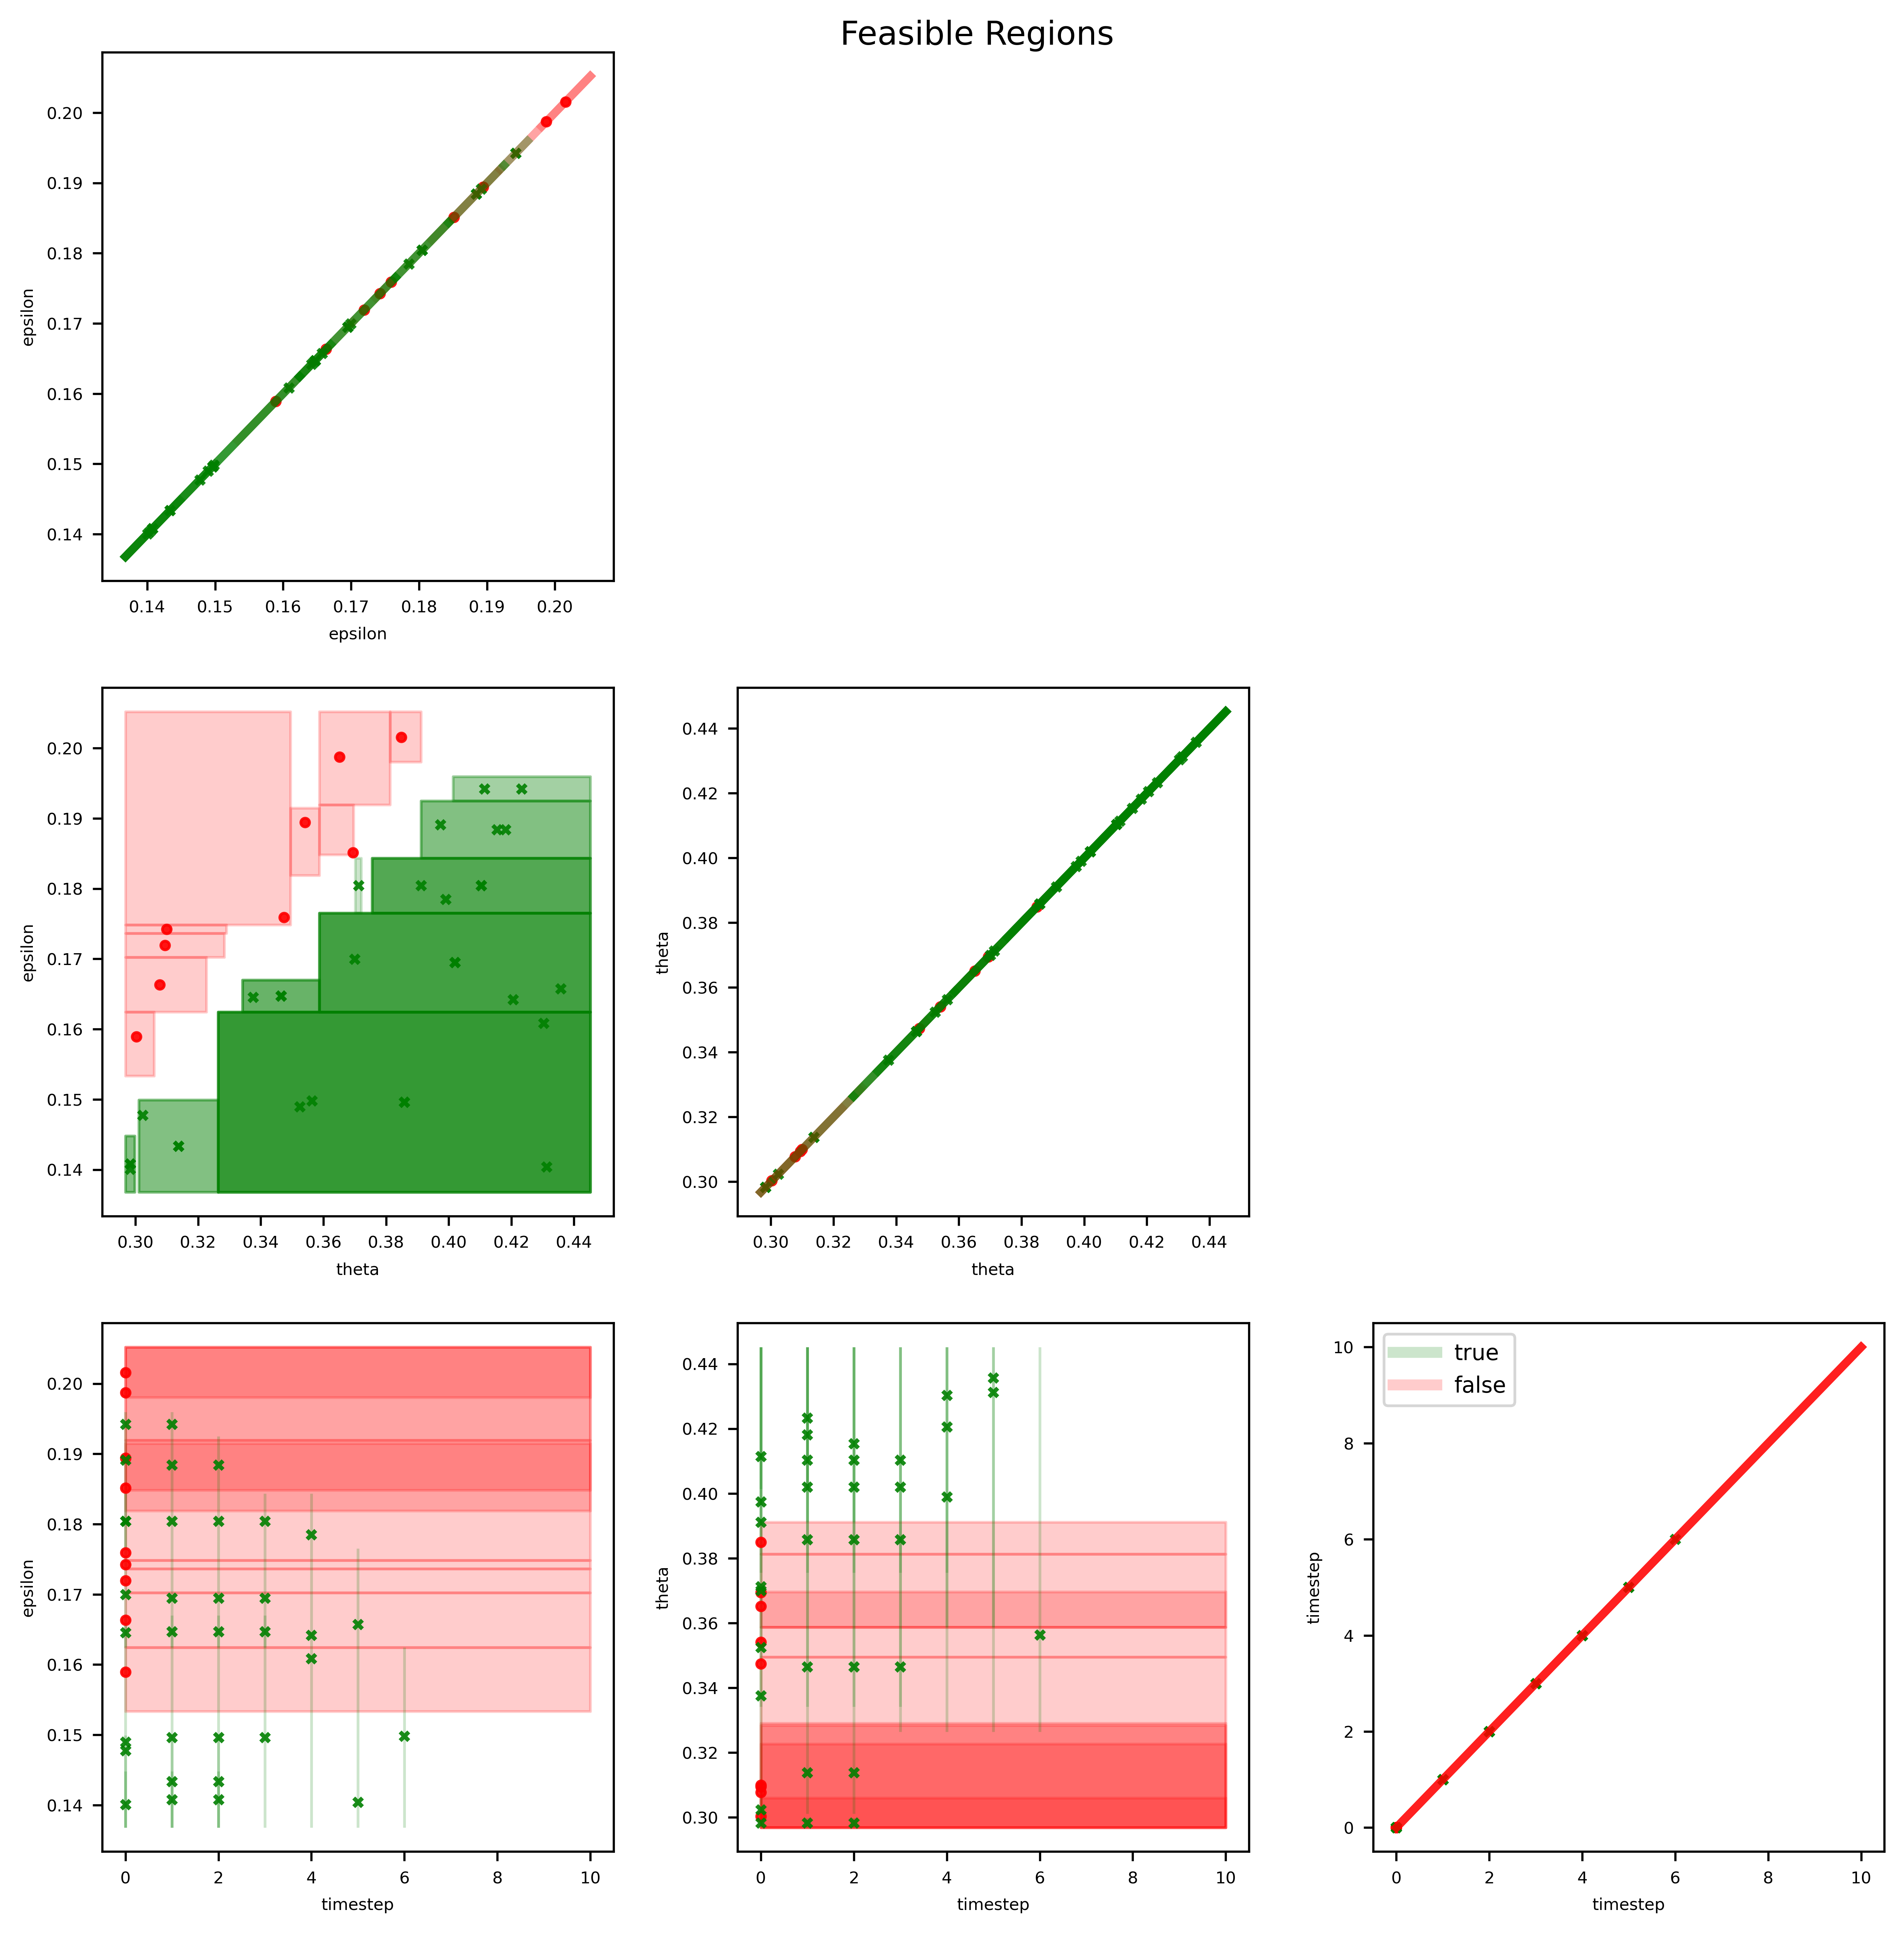

In [16]:
# Plot the parameter space

from funman_demo.parameter_space_plotter import ParameterSpacePlotter
ParameterSpacePlotter(
        results.parameter_space, plot_points=True, parameters=["epsilon", "theta", "timestep"]
    ).plot(show=True)

In [18]:
results.parameter_space.false_boxes[1].explain(  )

{'box': {'beta': {'lb': 0.011, 'ub': 0.011, 'closed_upper_bound': True},
  'gamma': {'lb': 0.456, 'ub': 0.456, 'closed_upper_bound': True},
  'delta': {'lb': 0.011, 'ub': 0.011, 'closed_upper_bound': True},
  'alpha': {'lb': 0.57, 'ub': 0.57, 'closed_upper_bound': True},
  'epsilon': {'lb': 0.15334018554687504,
   'ub': 0.16244375000000005,
   'closed_upper_bound': False},
  'zeta': {'lb': 0.125, 'ub': 0.125, 'closed_upper_bound': True},
  'lambda': {'lb': 0.034, 'ub': 0.034, 'closed_upper_bound': True},
  'eta': {'lb': 0.125, 'ub': 0.125, 'closed_upper_bound': True},
  'rho': {'lb': 0.034, 'ub': 0.034, 'closed_upper_bound': True},
  'theta': {'lb': 0.2968,
   'ub': 0.3059505859375001,
   'closed_upper_bound': False},
  'kappa': {'lb': 0.017, 'ub': 0.017, 'closed_upper_bound': True},
  'mu': {'lb': 0.017, 'ub': 0.017, 'closed_upper_bound': True},
  'nu': {'lb': 0.027, 'ub': 0.027, 'closed_upper_bound': True},
  'xi': {'lb': 0.017, 'ub': 0.017, 'closed_upper_bound': True},
  'tau': {'lb